In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
ad_data = pd.read_csv("advertising.csv")


In [55]:
ad_data.shape

(1000, 10)

In [53]:
ad_data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
import seaborn as sns, numpy as np
##sns.set(); np.random.seed(0)


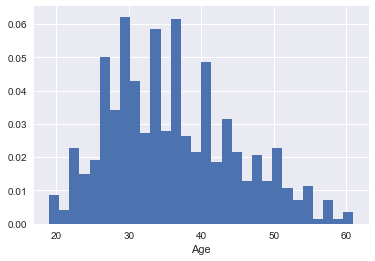

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(ad_data["Age"], normed=True, bins=30)
plt.xlabel('Age');

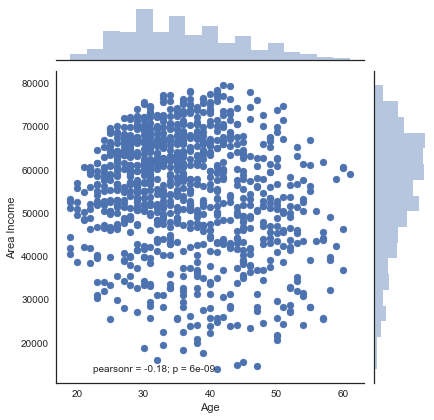

In [12]:
sns.set(style="white", color_codes=True)
sns.jointplot(x="Age", y="Area Income", data=ad_data)

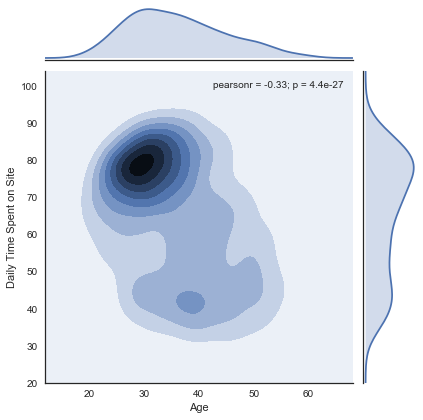

In [18]:
sns.jointplot(x="Age", y="Daily Time Spent on Site", kind="kde", data= ad_data);

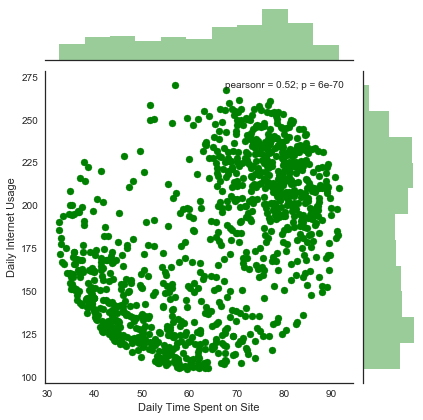

In [22]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

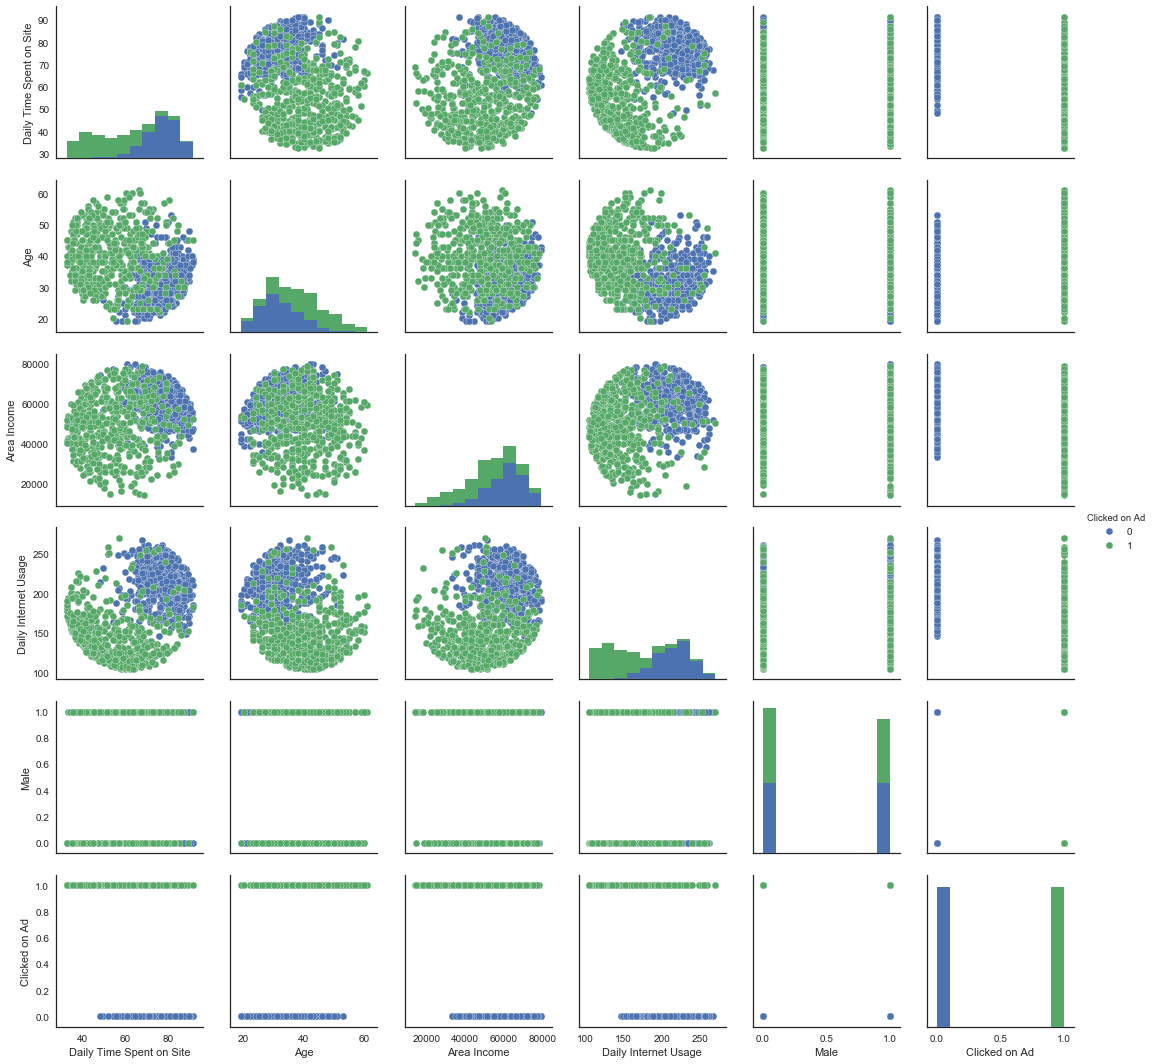

In [23]:
sns.pairplot(ad_data, hue="Clicked on Ad")

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logisticRegr = LogisticRegression()

In [36]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predictions = logisticRegr.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


C:\Users\Namrata\.spyder\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
from sklearn.model_selection import train_test_split

In [61]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']


In [62]:
alphas = 10**np.linspace(10,-2,1000)*0.5

In [63]:
##alphas

In [64]:
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
np.shape(coefs)

(1000L, 5L)

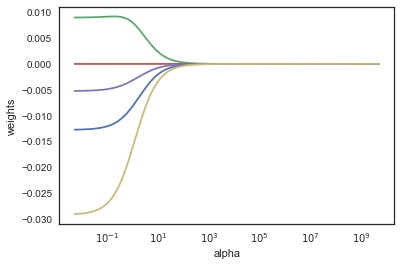

In [65]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [67]:
 ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))

Daily Time Spent on Site   -0.003844
Age                         0.004216
Area Income                -0.000003
Daily Internet Usage       -0.001568
Male                       -0.005587
dtype: float64
0.139575027693


In [68]:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, y_train) # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3)) # Calculate the test MSE

Daily Time Spent on Site   -2.299032e-12
Age                         2.671399e-12
Area Income                -1.882642e-15
Daily Internet Usage       -9.209019e-13
Male                       -2.423247e-12
dtype: float64
0.250101460055


In [69]:
 ridge2 = Ridge(alpha=0, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
5
pred = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred)) # Calculate the test MSE


Daily Time Spent on Site   -0.011776
Age                         0.008826
Area Income                -0.000007
Daily Internet Usage       -0.005590
Male                       -0.031175
dtype: float64
0.0517880481044


In [72]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.0080015515686935081

In [73]:
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

0.051751221302705354

In [74]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index=X.columns)

Daily Time Spent on Site   -0.012734
Age                         0.009006
Area Income                -0.000006
Daily Internet Usage       -0.005227
Male                       -0.029065
dtype: float64

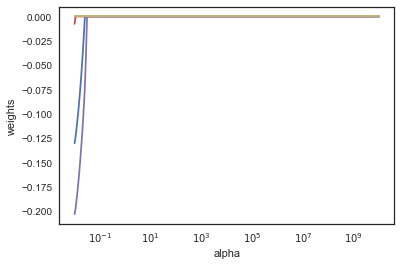

In [76]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')


In [83]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.051780668417997777

In [84]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Daily Time Spent on Site   -0.011763
Age                         0.008797
Area Income                -0.000007
Daily Internet Usage       -0.005588
Male                       -0.030339
dtype: float64

In [85]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [86]:
regr = ElasticNet(random_state=0)
regr.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
print(regr.coef_) 

[ -1.10658689e-02   2.45846264e-03  -7.08147871e-06  -5.71766032e-03
  -0.00000000e+00]


In [88]:
print(regr.intercept_) 

2.54941766697
